<a href="https://colab.research.google.com/github/nandyy719/MLalgos/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from google.colab import files

uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


In [ ]:

df = pd.read_csv(io.StringIO(uploaded['breast-cancer-wisconsin.data'].decode('utf-8')), header = None, names = ['sample_num', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'type'])
df.head()

,sample_num,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,type
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.tail()

,sample_num,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,type
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
df.shape

(699, 11)

In [ ]:
df.columns

Index(['sample_num', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'type'],
      dtype='object')

In [ ]:
df.describe()

,sample_num,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,type
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.nunique()

sample_num                     645
clump_thickness                 10
cell_size_uniformity            10
cell_shape_uniformity           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     11
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
type                             2
dtype: int64

In [ ]:
df.isnull().sum()

sample_num                     0
clump_thickness                0
cell_size_uniformity           0
cell_shape_uniformity          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
type                           0
dtype: int64

In [ ]:
#rename columns for better visualization
df.rename(columns = {'sample_num': 's_num', 'clump_thickness': 'thickness', 'cell_size_uniformity': 'c_size_uni.', 'cell_shape_uniformity': 'c_shape_uni.', 'marginal_adhesion': 'm_adhesion', 'single_epithelial_cell_size': 's_e_cell_size', 'bare_nuclei': 'b_nuclei', 'bland_chromatin': 'b_chroma', 'normal_nucleoli': 'n_nucleoli'}, inplace=True)

In [ ]:
df = df.replace({'?': np.nan}).dropna().astype(float)

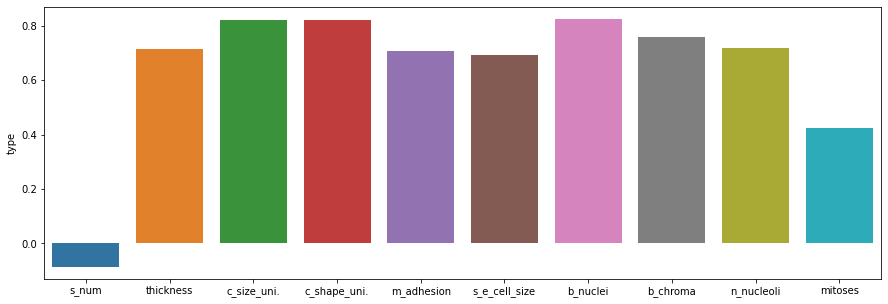

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.barplot(x = corr.columns.drop(['type']),y= corr['type'].drop(labels=['type']))

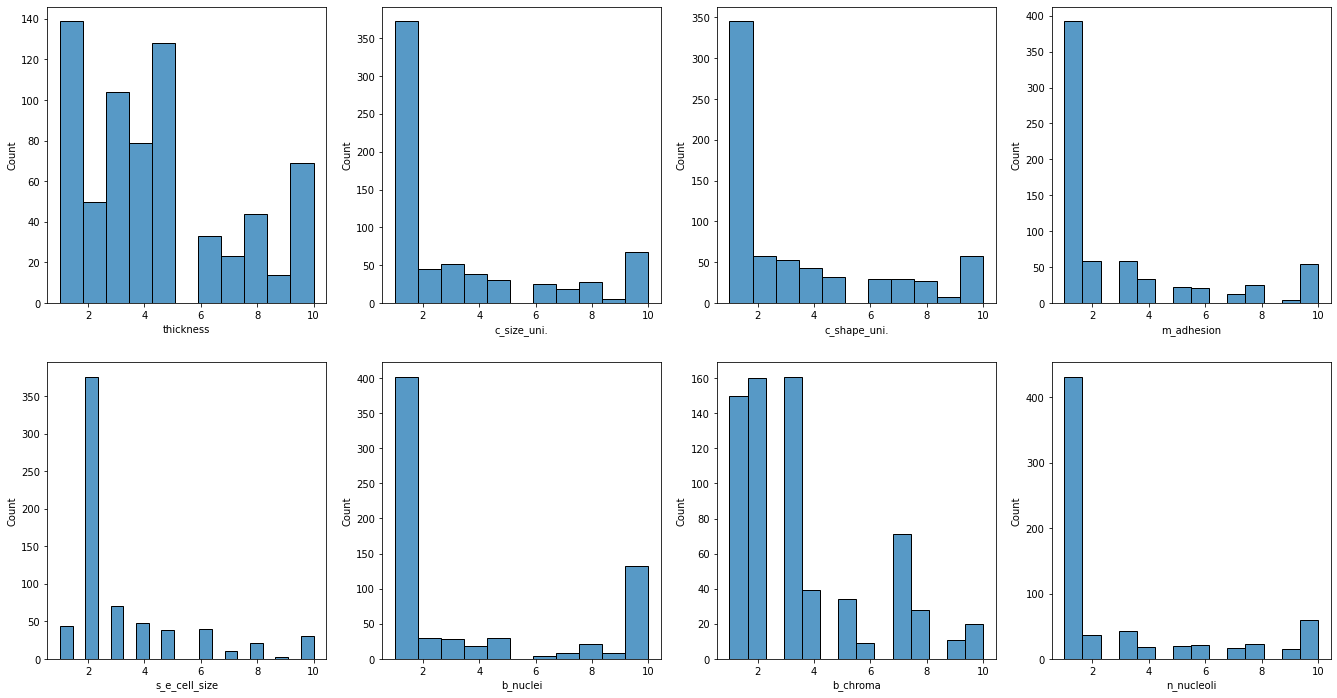

In [ ]:
df.drop(columns = ['s_num'], inplace=True)
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (23,12))
col_idx = 0
for i in range(2):
    for j in range(4):
        sns.histplot(data = df, x = df.columns[col_idx], ax=axes[i][j])
        col_idx+=1

In [ ]:
df.drop(columns= ['mitoses'], inplace= True)
for col in df.columns:
    df[col].astype(float)
X = df.loc[:, 'thickness': 'n_nucleoli'].to_numpy()
y = df[['type']].to_numpy()
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep = '\n')

(512, 8)
(171, 8)
(512, 1)
(171, 1)


In [ ]:
class GaussianNB:

  def fit(self, X, y):
    self.classes = np.unique(y)
    num_classes = len(self.classes)
    num_samples, num_features = X.shape

    self.mean  = np.zeros((num_classes, num_features))
    self.var = np.zeros((num_classes, num_features))

    self.priors = np.zeros(num_classes)


    for idx, c in enumerate(self.classes):
      X_c = X[c == y]
      self.priors[idx] = len(X_c) / len(X)
      self.mean[idx, :] = X_c.mean(axis = 0)
      self.var[idx, :] = X_c.var(axis = 0)
  def predict(self, X):
    for c in self.classes:
      
      



SyntaxError: ignored